In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


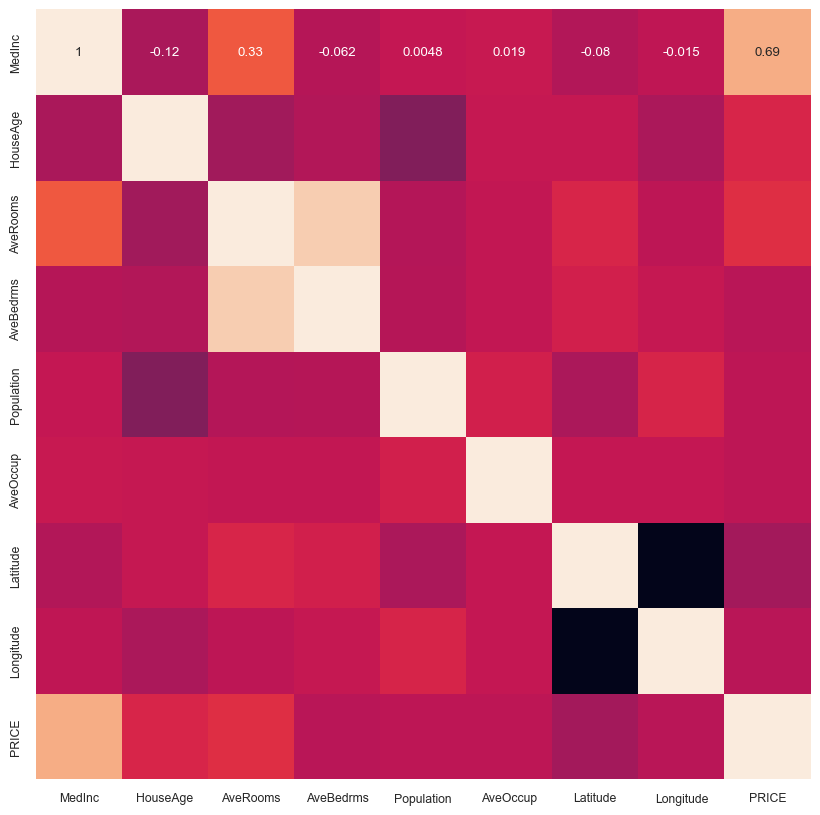

In [4]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
#두개의 상관관계
X=df.drop('PRICE', axis=1)
X_2=df[['MedInc', 'AveRooms']]
X_3=df[['MedInc', 'AveRooms', 'Latitude']]
X_4=df[['MedInc', 'AveRooms', 'Latitude', 'HouseAge']]
X_2.head()

,MedInc,AveRooms
0,8.3252,6.984127
1,8.3014,6.238137
2,7.2574,8.288136
3,5.6431,5.817352
4,3.8462,6.281853


In [11]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

1. 전체 데이터
(16512, 8) (16512,)
(4128, 8) (4128,)
평균제곱근오차 0.5269927956248035


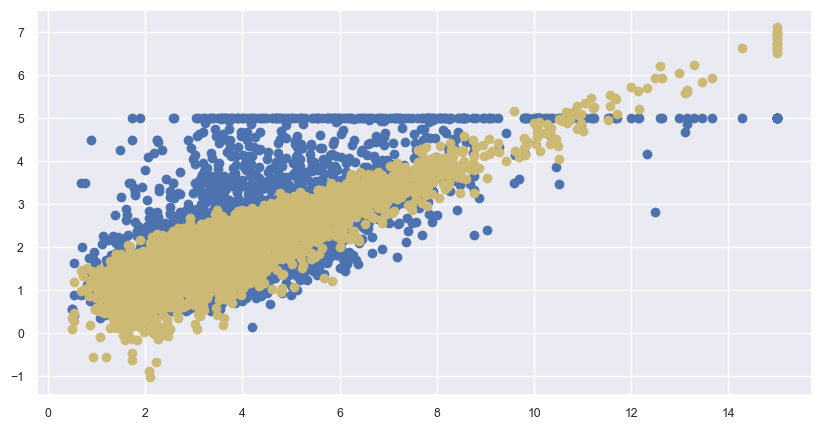

In [17]:
#전체 결과
print("1. 전체 데이터")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

###############

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

2. 2개 feature 'MedInc', 'AveRooms'
(16512, 2) (16512,)
(4128, 2) (4128,)
평균제곱근오차 0.6916011698420803


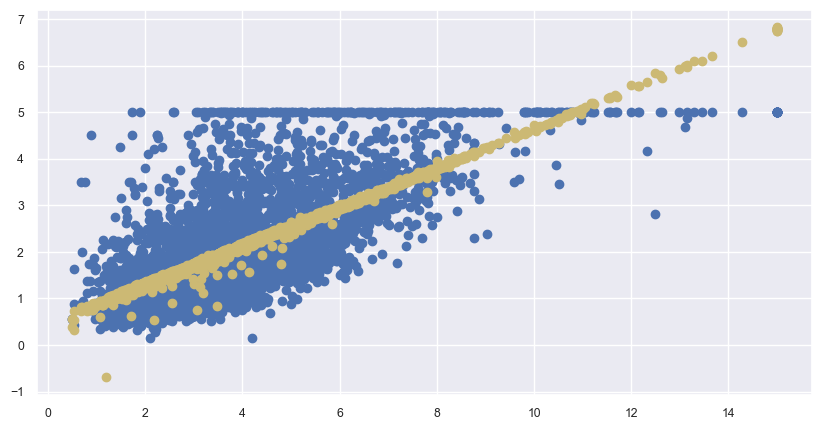

In [18]:
print("2. 2개 feature 'MedInc', 'AveRooms'")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_2,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

###############

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

3. 3개 feature 'MedInc', 'AveRooms', 'Latitude'
(16512, 3) (16512,)
(4128, 3) (4128,)
평균제곱근오차 0.6837417052679098


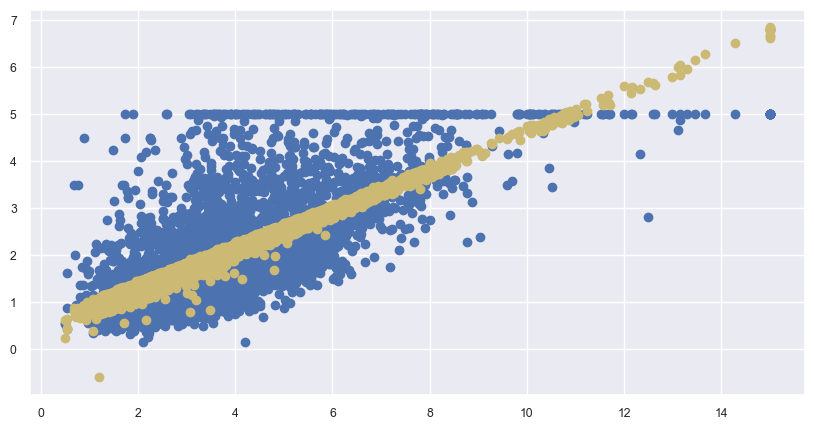

In [19]:
print("3. 3개 feature 'MedInc', 'AveRooms', 'Latitude'")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_3,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

###############

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

4. 4개 feature 'MedInc', 'AveRooms', 'Latitude', 'HouseAge'
(16512, 4) (16512,)
(4128, 4) (4128,)
평균제곱근오차 0.6408681554184653


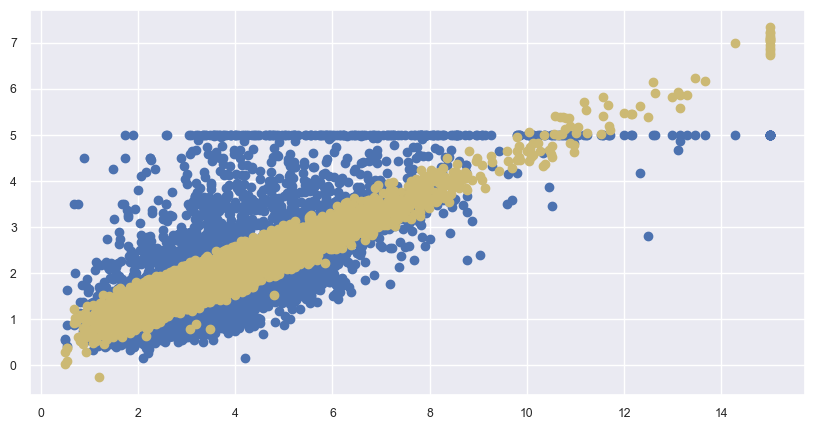

In [20]:
print("4. 4개 feature 'MedInc', 'AveRooms', 'Latitude', 'HouseAge'")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_4,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

###############

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [22]:
print("LinearRegression 결과 전체 feature에서의 결과가 가장 좋았고, feature selection 한 결과 중 가장 좋았던 것은 평균제곱근오차 0.64를 기록한 4개 feature 'MedInc', 'AveRooms', 'Latitude', 'HouseAge'이다.")

LinearRegression 결과 전체 feature에서의 결과가 가장 좋았고, feature selection 한 결과 중 가장 좋았던 것은 평균제곱근오차 0.64를 기록한 4개 feature 'MedInc', 'AveRooms', 'Latitude', 'HouseAge'이다.
